# Lab 6 - Data Visualization with Seaborn

In [543]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.patches as mp

## NFL Offense Data

1. Import the NFL week 3-7 data and add a week column to dataset and set the value to the given week (e.g. 3 )for all rows from that week. Combine the weekly dataframes by adding the dataframes together row-wise. Next, merge the division and abbreviation data to this dataframe so that the division and conference info is included (using  team_colors_logos.csv or nfl_teams.csv).

In [544]:
df3 = pd.read_csv('nfloffenseweek3.csv')
df4 = pd.read_csv('nfloffenseweek4.csv')
df5 = pd.read_csv('nfloffenseweek5.csv')
df6 = pd.read_csv('nfloffenseweek6.csv')
df7 = pd.read_csv('nfloffenseweek7.csv')
nfl=pd.read_csv('nfl_teams.csv')
details=pd.read_csv('teams_colors_logos.csv')
df3['Week'] = 3
df4['Week'] = 4
df5['Week'] = 5
df6['Week'] = 6
df7['Week'] = 7
df=pd.concat([df3, df4, df5, df6, df7])
nfl = nfl.merge(details, how='left', on='team')
df = df.merge(nfl, how='left', on='team')

2. Plot the average number of points scored each week for each team on a horizontal bar chart (with teams on the vertical axis and points on the horizontal axis). Add the points scored for each bar. (Hint: check out `plt.bar_label()`)

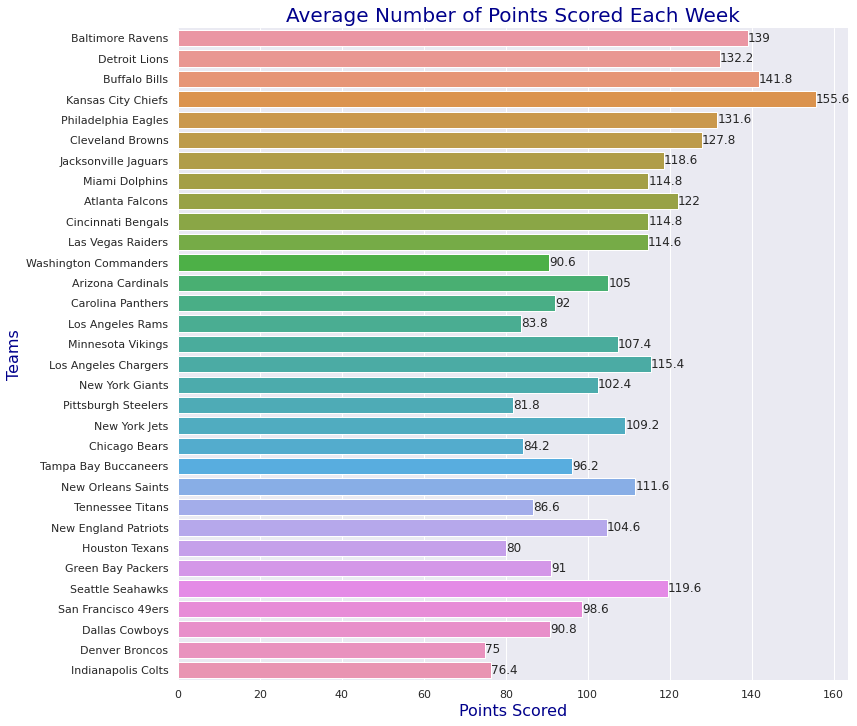

In [545]:
plt.figure(figsize=(12, 12))
ax = sns.barplot(x="points_scored", y="team", data=df, ci=None);
plt.xlabel('Points Scored', fontsize=16, color='darkblue');
plt.ylabel("Teams", fontsize=16, color='darkblue');
plt.title("Average Number of Points Scored Each Week", fontsize=20, color='darkblue');
sns.despine(left=True, bottom=True)
for i in ax.containers:
    ax.bar_label(i,)

3. Plot the average passing yards and average rushing yards for each team as a stacked bar chart.

Text(0, 0.5, 'Total Yards')

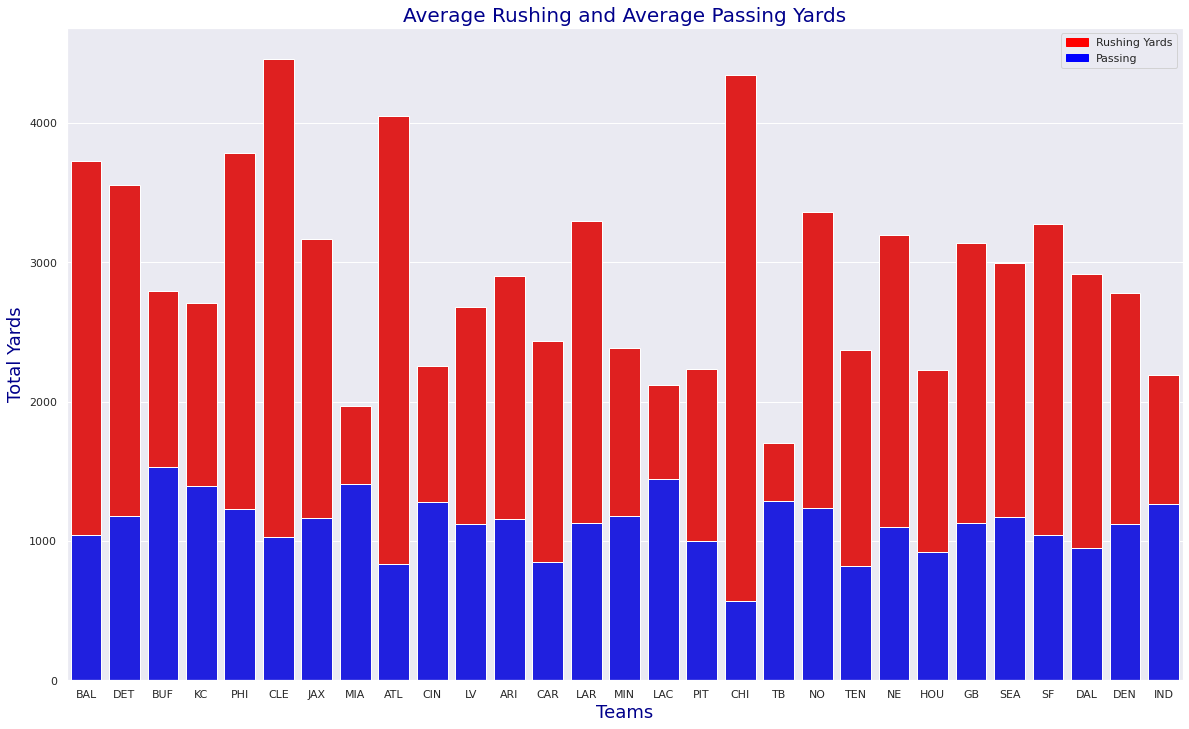

In [558]:
plt.figure(figsize=(20, 12))
sns.barplot(data=df, x=df.team_abbr_x, y=df.rushing_yards, ci=None, estimator=np.sum, color="red")
sns.barplot(data=df, x=df.team_abbr_x, y=df.passing_yards, ci=None, color="blue")
top=mp.Patch(color='red', label='Rushing Yards')
bottom=mp.Patch(color='blue', label='Passing')
plt.legend(handles=(top,bottom))
plt.title('Average Rushing and Average Passing Yards', color="darkBlue", fontsize=20)
plt.xlabel('Teams', color="darkBlue", fontsize=18)
plt.ylabel('Total Yards', color="darkBlue", fontsize=18)

4. Plot the average total yards vs average first downs for each team on a scatter plot (with first downs on the x axis and total yards on the y axis).

Text(0, 0.5, 'Total Yards')

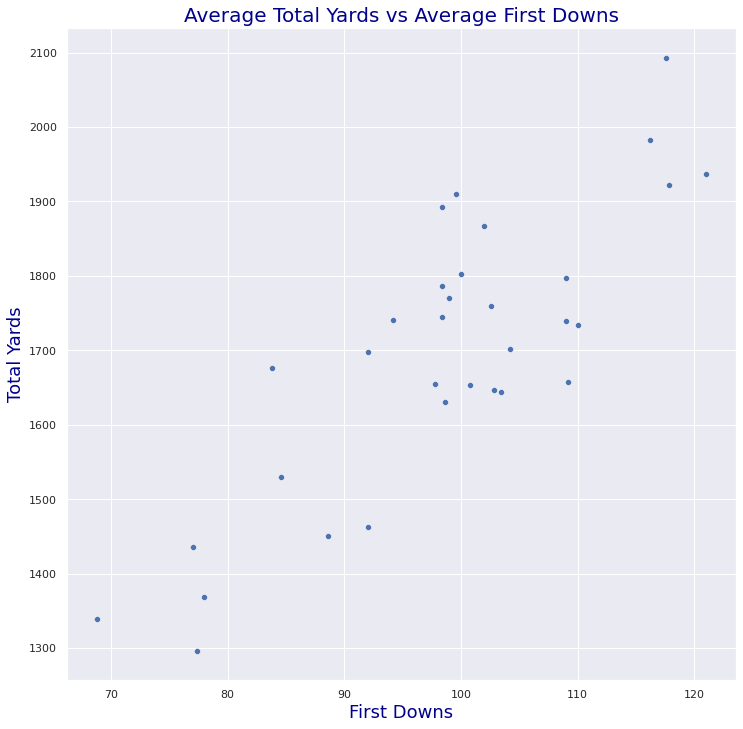

In [559]:
plt.figure(figsize=(12, 12))
sns.scatterplot(x=df.groupby('team')['1st_downs'].mean(), y=df.groupby('team').total_yards.mean());
plt.title('Average Total Yards vs Average First Downs', color="darkBlue", fontsize=20)
plt.xlabel('First Downs', color="darkBlue", fontsize=18)
plt.ylabel('Total Yards', color="darkBlue", fontsize=18)

5. Plot the penalty yards for the Balitmore Ravens and the LA Rams for each week as a line chart (with week on the x-axis and penalty yards on the y-axis).

Text(0, 0.5, 'Penalty Yards')

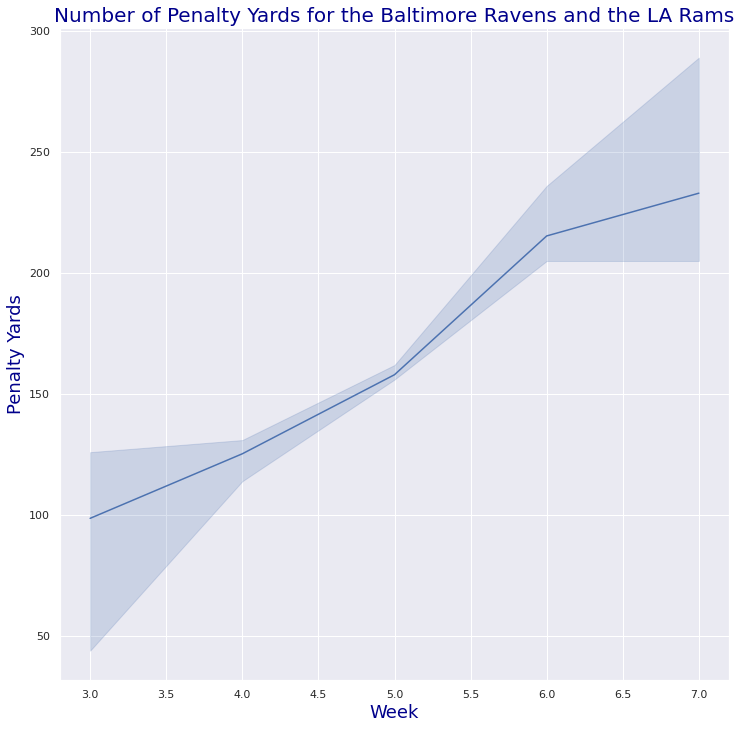

In [560]:
plt.figure(figsize=(12, 12))
low_teams = df[(df.team == 'Baltimore Ravens') | (df.team == 'Los Angeles Rams')]
sns.lineplot(x='Week', y='penalty_yards', data=low_teams)
plt.title('Number of Penalty Yards for the Baltimore Ravens and the LA Rams', color="darkBlue", fontsize=20)
plt.xlabel('Week', color="darkBlue", fontsize=18)
plt.ylabel('Penalty Yards', color="darkBlue", fontsize=18)

6. Plot the average total points vs average yards per play for each team as a scatter plot (with total points on the y-axis and yards per play on the x-axis).

Text(0, 0.5, 'Points Scored')

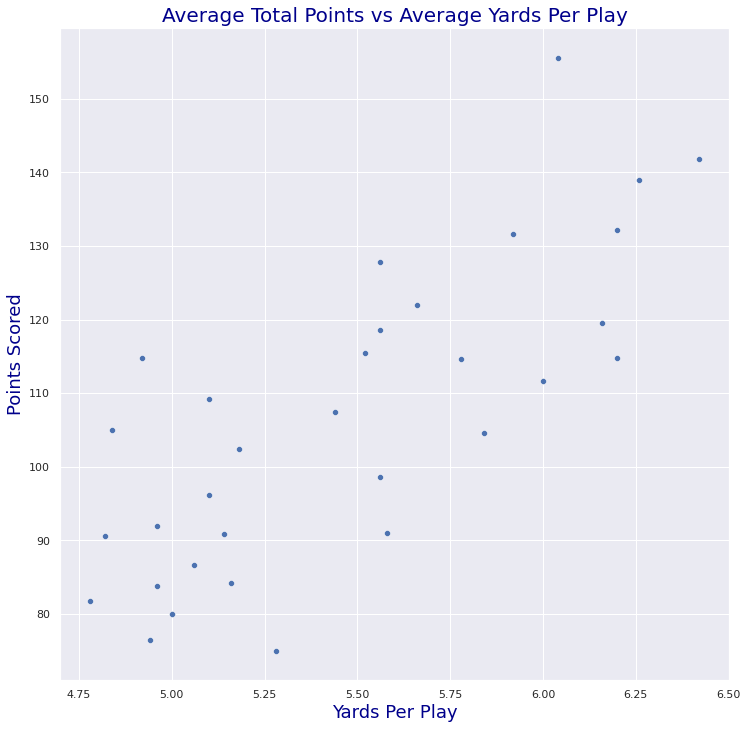

In [561]:
plt.figure(figsize=(12, 12))
sns.scatterplot(x=df.groupby('team').yards_per_play.mean(), y=df.groupby('team')['points_scored'].mean());
plt.title('Average Total Points vs Average Yards Per Play', color="darkBlue", fontsize=20)
plt.xlabel('Yards Per Play', color="darkBlue", fontsize=18)
plt.ylabel('Points Scored', color="darkBlue", fontsize=18)

7. Plot the number of penalty yards for each team in the NFC West for each week on bar chart.

Text(0, 0.5, 'Points Scored')

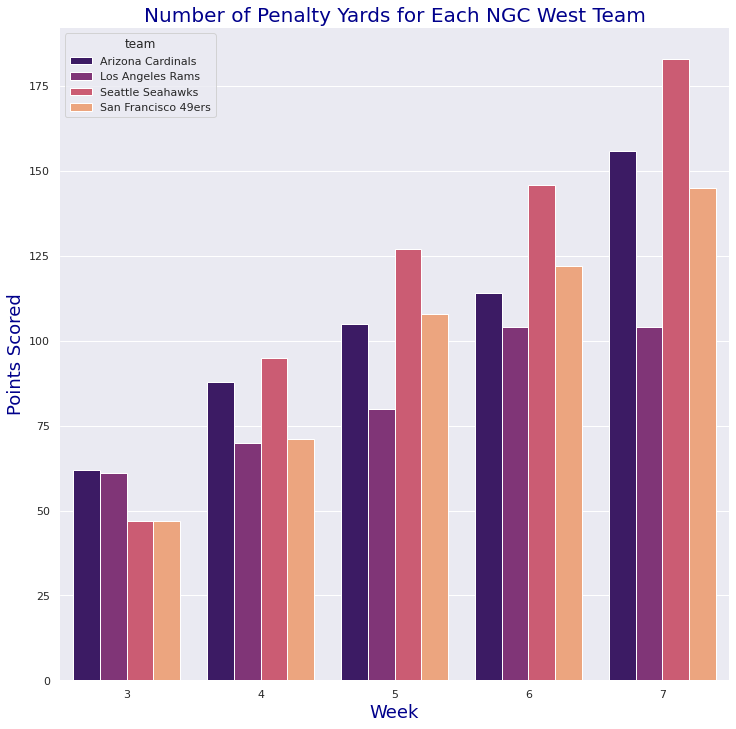

In [562]:
plt.figure(figsize=(12, 12))
NFC = df[(df.Conference == 'NFC') & (df.Division == 'West')]
sns.barplot(x="Week", y="points_scored", hue='team',data=NFC, palette="magma");
sns.despine(left=True, bottom=True)
plt.title('Number of Penalty Yards for Each NGC West Team', color="darkBlue", fontsize=20)
plt.xlabel('Week', color="darkBlue", fontsize=18)
plt.ylabel('Points Scored', color="darkBlue", fontsize=18)

8. Plot the average number of weekly points per (conference and division) on a horizontal bar chart. (There will be 8 bars.)

Text(0, 0.5, 'Conference & Division')

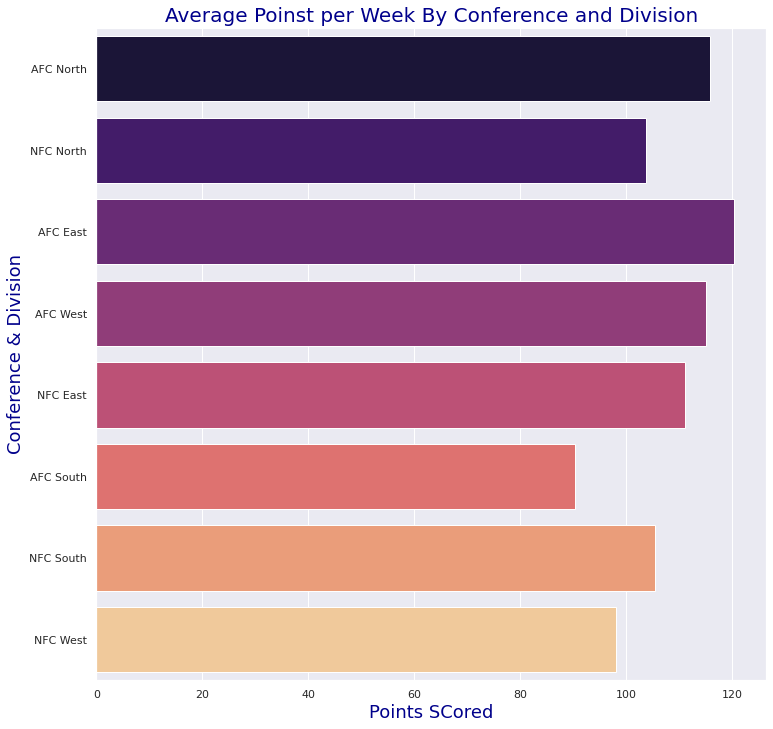

In [563]:
plt.figure(figsize=(12, 12))
sns.barplot(x='points_scored', y='team_division',  data=df, orient = 'h', ci=None, palette="magma");
plt.title('Average Poinst per Week By Conference and Division', color="darkBlue", fontsize=20)
plt.xlabel('Points SCored', color="darkBlue", fontsize=18)
plt.ylabel('Conference & Division', color="darkBlue", fontsize=18)